<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#평가방식-MAE" data-toc-modified-id="평가방식-MAE-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>평가방식 MAE</a></span></li><li><span><a href="#library-import" data-toc-modified-id="library-import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>library import</a></span></li><li><span><a href="#data-load" data-toc-modified-id="data-load-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>data load</a></span></li><li><span><a href="#EDA-target을-주인공으로" data-toc-modified-id="EDA-target을-주인공으로-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA target을 주인공으로</a></span></li><li><span><a href="#전처리" data-toc-modified-id="전처리-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>전처리</a></span></li><li><span><a href="#공휴일-전처리-,,,,-하려고-했는데-복잡해서-일단-킵" data-toc-modified-id="공휴일-전처리-,,,,-하려고-했는데-복잡해서-일단-킵-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>공휴일 전처리 ,,,, 하려고 했는데 복잡해서 일단 킵</a></span></li><li><span><a href="#feature-selection" data-toc-modified-id="feature-selection-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>feature selection</a></span></li><li><span><a href="#random-search-cv" data-toc-modified-id="random-search-cv-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>random search cv</a></span></li></ul></div>

# 평가방식 MAE
... 회귀.... <br>
회귀도 input은 수치여야함.

# library import

In [2]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# data load

In [3]:
train = pd.read_csv('235743_구내식당 식사 인원 예측 AI 경진대회_data/train.csv')
test = pd.read_csv('235743_구내식당 식사 인원 예측 AI 경진대회_data/test.csv')

# EDA target을 주인공으로

<Figure size 3000x2000 with 0 Axes>

Text(0.5, 1.0, '중식계 이상치 확인')

<AxesSubplot:title={'center':'중식계 이상치 확인'}>

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
1094,2020-08-07,금,2989,605,239,1,142.0,모닝롤/마약토스트 우유/주스 계란후라이 누룽지탕/흑미밥 순두부백탕 양념깻잎찜 양상추...,쌀밥/흑미밥/찰현미밥 얼갈이된장국 닭다리바베큐오븐구이 아귀순살찜 유부채소겨자냉채 포...,폭탄주먹밥 꼬치어묵국 매운떡볶이 순대찜*소금 모둠튀김(만두*고추*통계란) 포기김치,476.0,261.0
1099,2020-08-14,금,2989,644,256,1,116.0,모닝롤/시나몬페스츄리 우유/주스 계란후라이 누룽지탕/흑미밥 순두부된장국 참치김치볶음...,쌀밥/흑미밥/찰현미밥 동태탕 살살치킨&칠리소스 브로콜리버섯볶음 부추와사비무침 포기김...,계란볶음밥 숙주고기짬뽕 고추잡채 연유꽃빵튀김 짜사이볶음 포기김치,477.0,212.0
1129,2020-09-28,월,3132,985,188,81,142.0,모닝롤/애플파이 우유/주스 계란후라이 누룽지탕/흑미밥 유부김칫국 베이컨숙주볶음 양상...,쌀밥/흑미밥/찰현미밥 떡만두국 오리대패불고기 꽁치캔김치조림 파프리카해초무침 포기김치...,흑미밥 우거지된장국 닭볶음탕 섭산적데리야끼조림 콩나물무침 포기김치,358.0,165.0
1148,2020-10-30,금,3008,340,298,1,107.0,모닝롤/블루베리프렌치토스트 우유/주스 계란후라이 녹두죽/흑미밥 김칫국 양념깻잎지찜 ...,쌀밥/흑미밥/찰현미밥 건새우아욱국 쇠고기숙주볶음 적어양념장구이 통들깨부추무침 무생채...,흑미밥 컵라면&찐계란 순대채소볶음 (NEW)까르보나라떡볶이 근대고추장무침 포기김치,398.0,259.0
1153,2020-11-06,금,3021,266,305,1,119.0,모닝롤/크로크무슈 우유/주스 계란후라이 채소죽/흑미밥 호박새우젓국 해물동그랑땡전 양...,쌀밥/흑미밥/찰현미밥 근대된장국 수제탕수육 매콤해물볶음 치커리오이무침 포기김치 양상...,오뗄햄김밥 김치어묵탕 백종원의사라다빵 가지나물 꼬들단무지 포기김치,459.0,276.0


<Figure size 3000x2000 with 0 Axes>

Text(0.5, 1.0, '석식계 이상치 확인')

<AxesSubplot:title={'center':'석식계 이상치 확인'}>

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
932,2019-11-27,수,3104,134,288,1,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 무채국 (우민찌:...,나물비빔밥 (쌀:국내산) 맑은국 감자치즈구이 군만두 치커리유자청생채 포기김치...,*,732.0,0.0
955,2019-12-31,화,3111,709,149,22,0.0,모닝롤/야채샌드 우유/주스 스크램블에그 고구마죽/쌀밥 (쌀:국내산) 열무된장국 ...,쌀밥/잡곡밥 (쌀:국내산) 배추된장국 닭볶음탕 (닭:국내산) 부추깻잎전 양배추쌈...,*,349.0,0.0
973,2020-01-29,수,2821,101,214,4,0.0,모닝롤/야채샌드 우유/주스 스크램블에그 고구마죽/쌀밥 (쌀:국내산) 꽃게탕 미역...,"콩나물밥*양념장 (쌀:국내산,소고기:호주) 가쯔오장국 치킨핑거 (닭:국내산) 꽃맛...",자기개발의날,1197.0,0.0
993,2020-02-26,수,2872,109,190,4,0.0,모닝롤/고구마파이 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 홍합탕 감자...,"낙지비빔밥 (쌀:국내,낙지:중국산) 팽이장국 치킨텐더*콘소스D (닭:국내산) 과일...",자기개발의날,1105.0,0.0
1166,2020-11-25,수,3021,206,191,3,387.0,모닝롤/베이글 우유/주스 계란후라이 녹두죽/흑미밥 아귀지리탕 돈사태찜 양상추샐러드 ...,쌀밥/흑미밥/찰현미밥 콩비지김치찌개 해물누룽지탕 탕평채 고추장감자조림 깍두기/수제과...,＜자기 계발의 날＞,1146.0,0.0


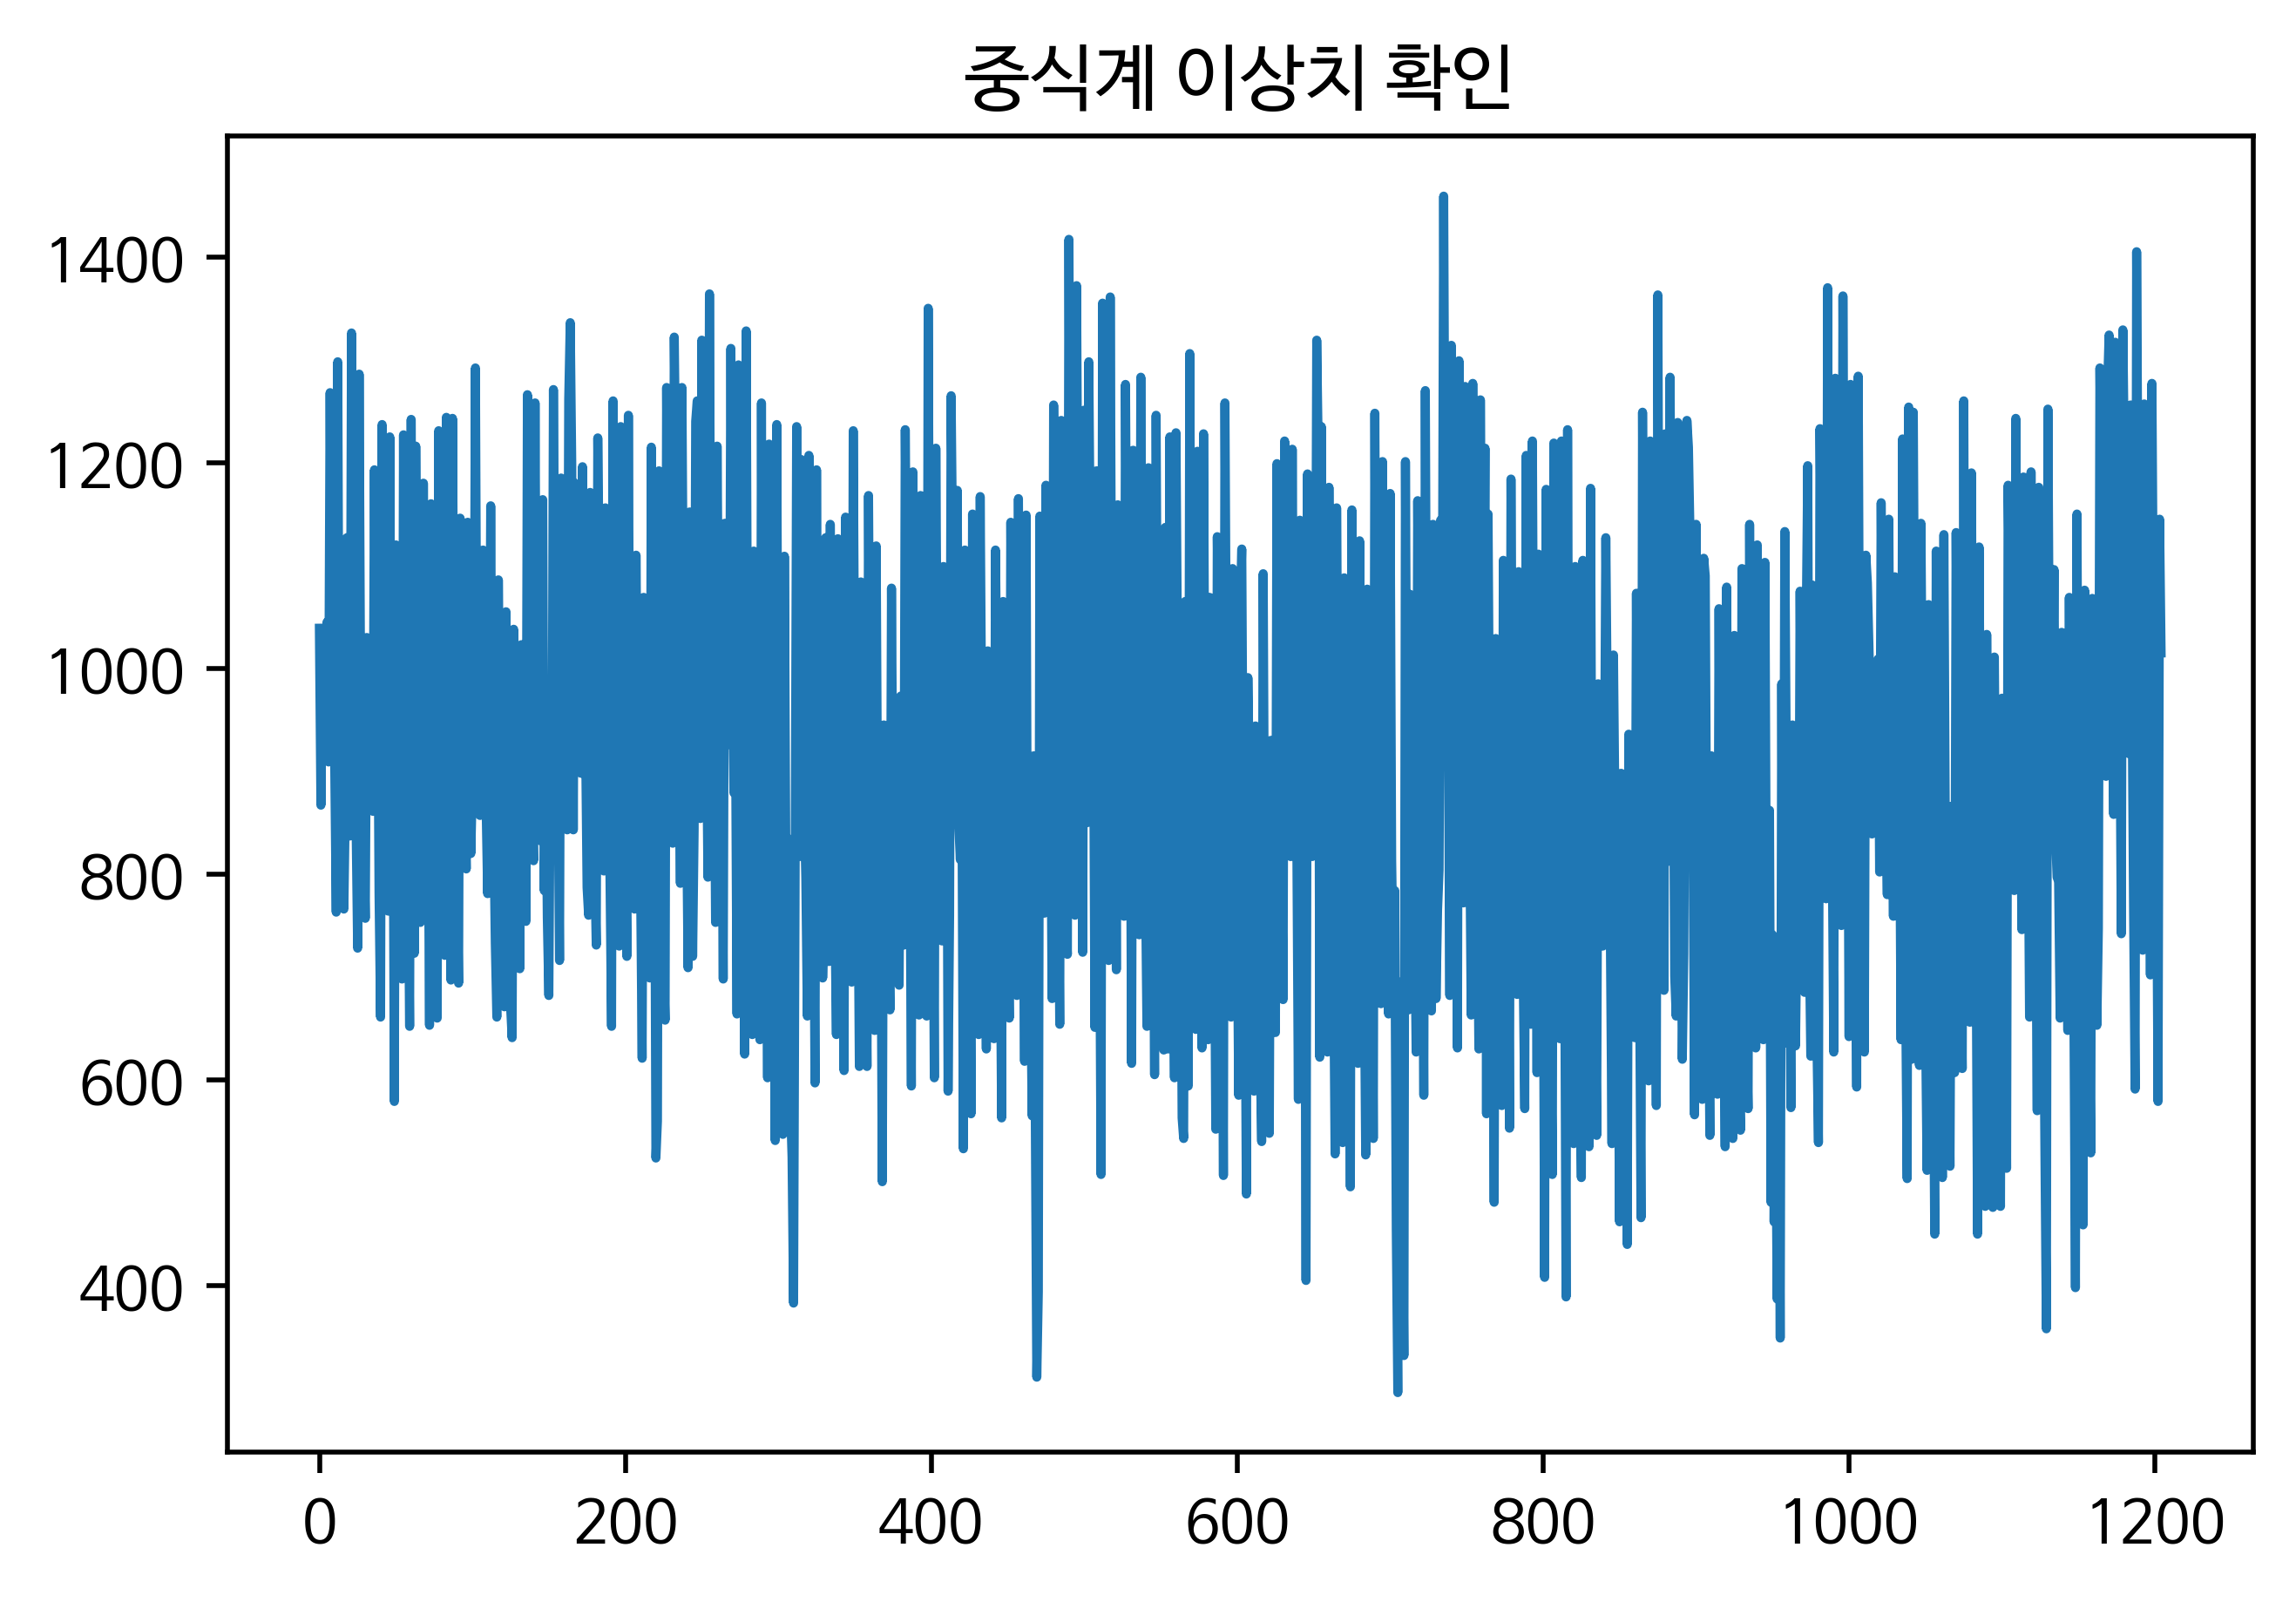

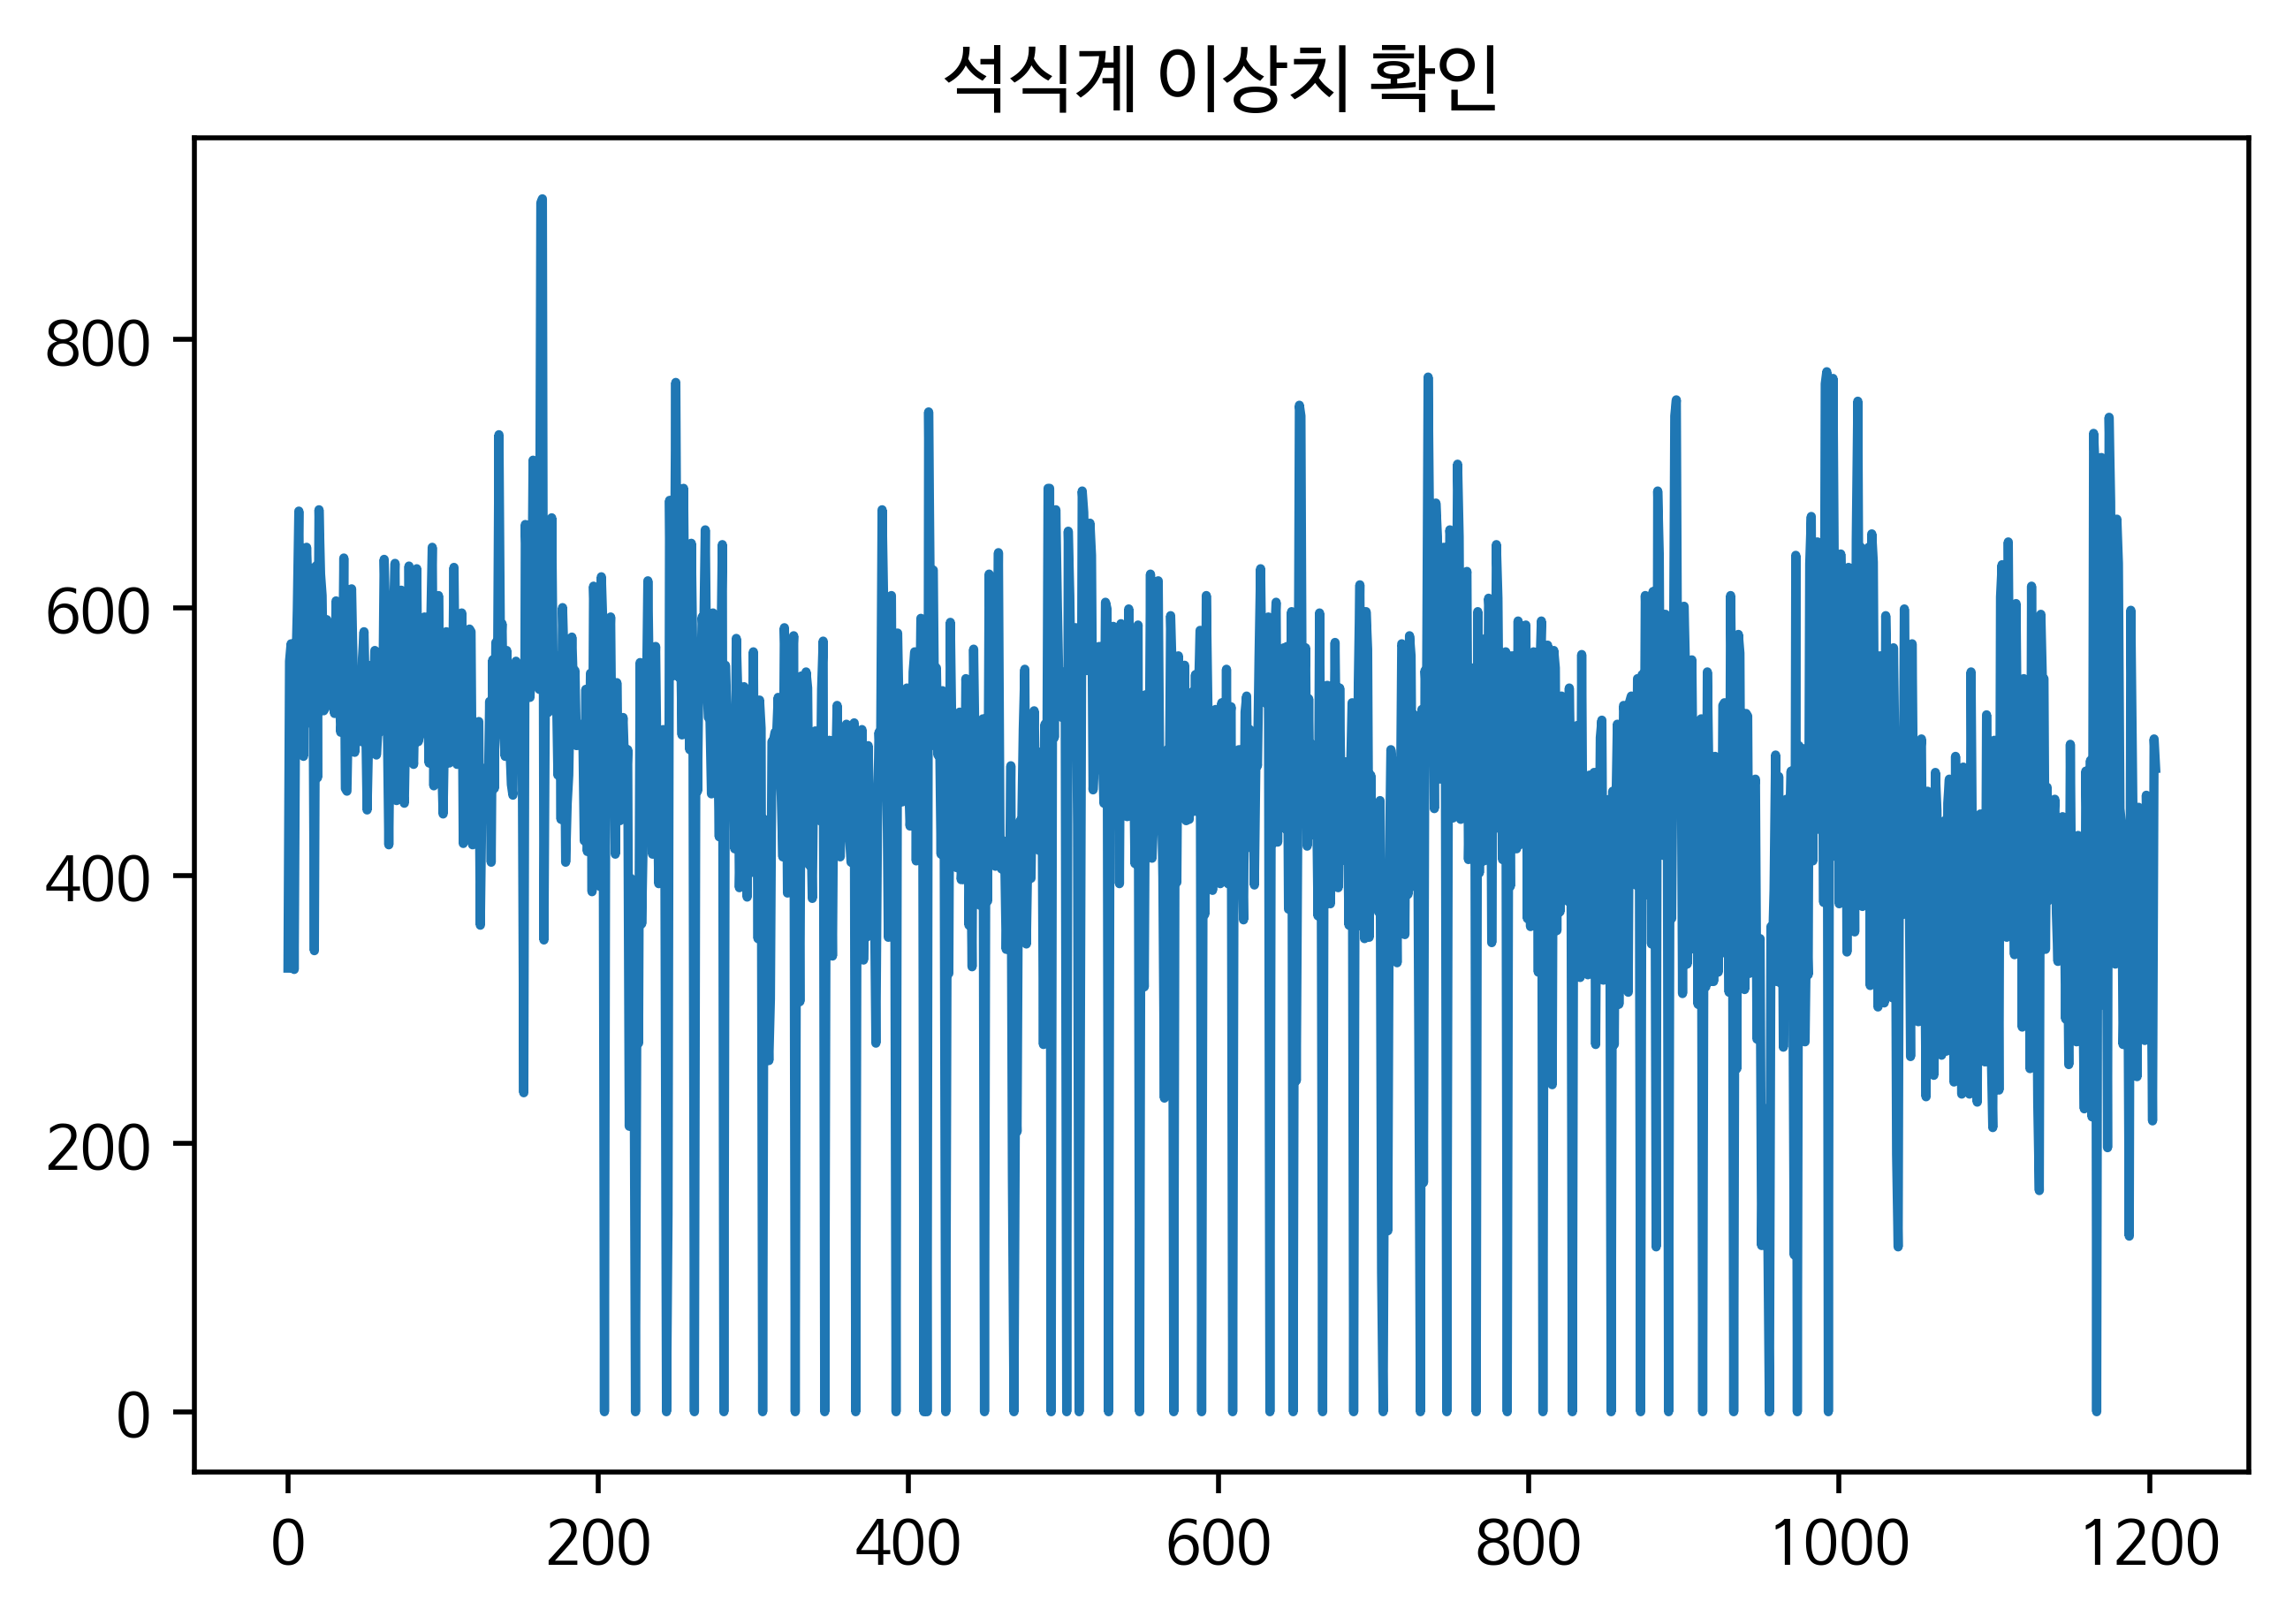

In [4]:
plt.figure(dpi=500)
plt.title('중식계 이상치 확인')
train['중식계'].plot()
train[train['중식계']<500].tail() # 휴가자수가 많은 날 (주로 주말이 낀 공휴일 전후)에 이상치 생김.
# 휴가자수로 인한 이상치이므로, 예측 가능한 이상치.


plt.figure(dpi=500)
plt.title('석식계 이상치 확인')
train['석식계'].plot()
train[train['석식계']==0].tail() # 석식 메뉴에 자기 계발의 날이라고 적혀있음. 석식 == 0인 날 없애는 전처리 하기.
# test에는 자기 계발의 날 적혀있는 날 없으므로, 예측 불가능한 이상치.

In [5]:
test.shape

(50, 10)

In [6]:
train.head(6)
# 일자
# 요일 ###
# 본사 정원수
# 본사휴가자수
# 본사출장자수
# 본사시간외근무명령서승인건수
# 현본사소속재택근무자수 ###
# 조식메뉴
# 중식메뉴 ###
# 석식메뉴 ###

# 중식계
# 석식계

# 중식계, 석식계는 합계인듯. 예측해야 하는 것.

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
5,2016-02-11,목,2601,383,143,417,0.0,팬케익/찐빵 우유/두유/주스 계란후라이 견과류죽/쌀밥 (쌀:국내산) 감자찌개 ...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 시래기국 훈제오리구이 도토리묵무침 쌈무/양...","참치회덮밥 (쌀,현미흑미:국내산) 맑은국 군만두 과일샐러드 락교 포기김치 (...",1045.0,550.0


# 전처리

In [7]:
# train['조식메뉴'].value_counts()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [8]:
# train['일자'].loc[0][5:7]

def month(text:str):
    return int(text[5:7])

def day(text:str):
    return int(text[8:])

train['월'] = train['일자'].map(month)
train['일'] = train['일자'].map(day)

test['월'] = test['일자'].map(month)
test['일'] = test['일자'].map(day)

In [9]:
train = train[train['석식계']!=0] # 예상 불가능한 이상치 없애기

In [10]:
train.reset_index(drop = True, inplace = True)

In [11]:
train.shape

(1162, 14)

In [12]:
train.loc[(train['조식메뉴'].str.contains('쇠'))|(train['조식메뉴'].str.contains('소'))|(train['조식메뉴'].str.contains('고기'))|
          (train['조식메뉴'].str.contains('돼지'))|(train['조식메뉴'].str.contains('돈육'))|
          (train['조식메뉴'].str.contains('닭'))|(train['조식메뉴'].str.contains('치킨'))|
          (train['조식메뉴'].str.contains('오리')), '조식메뉴'] = 1
train.loc[train['조식메뉴']!=1, '조식메뉴'] = 0
test.loc[(test['조식메뉴'].str.contains('쇠'))|(test['조식메뉴'].str.contains('소'))|(test['조식메뉴'].str.contains('고기'))|
          (test['조식메뉴'].str.contains('돼지'))|(test['조식메뉴'].str.contains('돈육'))|
          (test['조식메뉴'].str.contains('닭'))|(test['조식메뉴'].str.contains('치킨'))|
          (test['조식메뉴'].str.contains('오리')), '조식메뉴'] = 1
test.loc[test['조식메뉴']!=1, '조식메뉴'] = 0

# int 형으로 바꾸기
train['조식메뉴'] = train['조식메뉴'].map(int)
test['조식메뉴'] = test['조식메뉴'].map(int)

In [13]:
# train[train['중식메뉴'].contains('고기')]
# (train.loc[train['중식메뉴'].str.contains('고기'), '중식메뉴']).count()
train.shape
# train.loc[train['중식메뉴'].str.contains('고기'), '중식메뉴']
train.loc[(train['중식메뉴'].str.contains('쇠'))|(train['중식메뉴'].str.contains('소'))|(train['중식메뉴'].str.contains('고기'))|
          (train['중식메뉴'].str.contains('돼지'))|(train['중식메뉴'].str.contains('돈육'))|
          (train['중식메뉴'].str.contains('닭'))|(train['중식메뉴'].str.contains('치킨'))|
          (train['중식메뉴'].str.contains('오리')), '중식메뉴'] = 1
train.loc[train['중식메뉴']!=1, '중식메뉴'] = 0
# train.loc[(train['중식메뉴'].str.contains('돼지'))|(train['중식메뉴'].str.contains('돈육')), '중식메뉴']
# train.loc[(train['중식메뉴'].str.contains('닭'))|(train['중식메뉴'].str.contains('치킨')), '중식메뉴']
# train.loc[(train['중식메뉴'].str.contains('오리')), '중식메뉴']

test.loc[(test['중식메뉴'].str.contains('쇠'))|(test['중식메뉴'].str.contains('소'))|(test['중식메뉴'].str.contains('고기'))|
          (test['중식메뉴'].str.contains('돼지'))|(test['중식메뉴'].str.contains('돈육'))|
          (test['중식메뉴'].str.contains('닭'))|(test['중식메뉴'].str.contains('치킨'))|
          (test['중식메뉴'].str.contains('오리')), '중식메뉴'] = 1
test.loc[test['중식메뉴']!=1, '중식메뉴'] = 0

# int 형으로 바꾸기
train['중식메뉴'] = train['중식메뉴'].map(int)
test['중식메뉴'] = test['중식메뉴'].map(int)

(1162, 14)

In [14]:
train.loc[(train['석식메뉴'].str.contains('쇠'))|(train['석식메뉴'].str.contains('소'))|(train['석식메뉴'].str.contains('고기'))|
          (train['석식메뉴'].str.contains('돼지'))|(train['석식메뉴'].str.contains('돈육'))|
          (train['석식메뉴'].str.contains('닭'))|(train['석식메뉴'].str.contains('치킨'))|
          (train['석식메뉴'].str.contains('오리')), '석식메뉴'] = 1
train.loc[train['석식메뉴']!=1, '석식메뉴'] = 0

test.loc[(test['석식메뉴'].str.contains('쇠'))|(test['석식메뉴'].str.contains('소'))|(test['석식메뉴'].str.contains('고기'))|
          (test['석식메뉴'].str.contains('돼지'))|(test['석식메뉴'].str.contains('돈육'))|
          (test['석식메뉴'].str.contains('닭'))|(test['석식메뉴'].str.contains('치킨'))|
          (test['석식메뉴'].str.contains('오리')), '석식메뉴'] = 1
test.loc[test['석식메뉴']!=1, '석식메뉴'] = 0

# int 형으로 바꾸기
train['석식메뉴'] = train['석식메뉴'].map(int)
test['석식메뉴'] = test['석식메뉴'].map(int)

In [15]:
train['요일'].values

train['요일'] = train['요일'].map({'월':1, '화':2, '수':3, '목':4, '금':5})
test['요일'] = test['요일'].map({'월':1, '화':2, '수':3, '목':4, '금':5})

train['요일']

array(['월', '화', '수', ..., '금', '월', '화'], dtype=object)

0       1
1       2
2       3
3       4
4       5
       ..
1157    3
1158    4
1159    5
1160    1
1161    2
Name: 요일, Length: 1162, dtype: int64

In [16]:
train['본사근무자수'] = train['본사정원수'] - sum((train['본사휴가자수'], train['본사출장자수'], train['현본사소속재택근무자수']))

train['본사근무자수'] = train['본사근무자수'].map(int)
train['현본사소속재택근무자수'] = train['현본사소속재택근무자수'].map(int)

In [17]:
test['본사근무자수'] = test['본사정원수'] - sum((test['본사휴가자수'], test['본사출장자수'], test['현본사소속재택근무자수']))

test['본사근무자수'] = test['본사근무자수'].map(int)
test['현본사소속재택근무자수'] = test['현본사소속재택근무자수'].map(int)

# 공휴일 전처리 ,,,, 하려고 했는데 복잡해서 일단 킵

In [87]:
# 주말 전에 혹은 후에 공휴일이 있다면 1 아니면 0
# 예를 들어 금공휴일일 경우 목, 월 = 1
# 월 공휴일일 경우 금, 화 = 1
# 화요일에 공휴일일 경우 월 = 1
# 목요일에 공휴일일 경우 금 = 1
# 공휴일이 주말일 경우는 무시해야

# 공휴일 리스트
# com_hol_lst = ['01-01', '03-01', '05-05', '06-06', '08-15', '10-03', '10-09', '12-25'] # 공통

hol_lst = ['2016-01-01', '2016-02-08', '2016-02-09', '2016-02-10', '2016-03-01', '2016-04-13', '2016-05-05', '2016-05-06',
           '2016-06-06', '2016-08-15', '2016-09-14', '2016-09-15', '2016-09-16', '2016-10-03',
           
           '2017-01-27', '2017-01-30', '2017-03-01', '2017-05-03', '2017-05-05', '2017-05-09', '2017-06-06', '2017-08-15',
           '2017-10-02', '2017-10-03', '2017-10-04', '2017-10-05', '2017-10-06', '2017-10-09', '2017-12-25',
           
           '2018-01-01', '2018-02-15', '2018-02-16', '2018-03-01', '2018-05-07', '2018-05-22', '2018-06-06', '2018-06-13',
           '2018-08-15', '2018-09-24', '2018-09-25', '2018-09-26', '2018-10-03', '2018-10-09', '2018-12-25',
           
           '2019-01-01', '2019-02-04', '2019-02-05', '2019-02-06', '2019-05-06', '2019-06-06', '2019-08-15', '2019-09-12',
           '2019-09-13', '2019-10-03', '2019-10-09', '2019-12-25',
           
           '2020-01-01', '2020-01-24', '2020-01-27', '2020-04-15', '2020-04-30', '2020-05-05', '2020-08-17', '2020-09-30',
           '2020-10-01', '2020-10-02', '2020-10-09', '2020-12-25']

In [126]:
from datetime import datetime, timedelta
import datetime as dt

dt.datetime.strptime('2016-05-06', '%Y-%m-%d').date() + timedelta(1)
tmp = dt.datetime.strptime('2016-05-06', '%Y-%m-%d').date()
tmp
tmp1 = (dt.datetime.strptime('2016-05-06', '%Y-%m-%d').date() + timedelta(1)).strftime('%Y-%m-%d')
tmp1

cnt = 0
while len(train[train['일자'] == (tmp).strftime('%Y-%m-%d')]) == 0:
    cnt +=1
    tmp = tmp-timedelta(1)
    tmp
train[train['일자'] == (tmp).strftime('%Y-%m-%d')]
train[train['일자'] == (tmp).strftime('%Y-%m-%d')]['요일'] == 4

train[train['일자'] == (tmp).strftime('%Y-%m-%d')]['요일'] + cnt == 4 # 공휴일이 목요일이면
train[train['일자'] == (tmp).strftime('%Y-%m-%d')]['요일'] + cnt == 5 # 공휴일이 금요일이면
train[train['일자'] == (tmp).strftime('%Y-%m-%d')]['요일'] + cnt == 6 # 공휴일이 토요일이면

#     train[train['일자'] == (tmp-timedelta(1)).strftime('%Y-%m-%d')]
#     if len(train[train['일자'] == (tmp).strftime('%Y-%m-%d')]) == 0:
#         train[train['일자'] == (tmp-timedelta(1)).strftime('%Y-%m-%d')]
#     else:
#         train[train['일자'] == (tmp).strftime('%Y-%m-%d')]

datetime.date(2016, 5, 7)

datetime.date(2016, 5, 6)

'2016-05-07'

datetime.date(2016, 5, 5)

datetime.date(2016, 5, 4)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월,일,본사근무자수
62,2016-05-04,3,2635,150,244,0,0,0,1,1,723.0,636.0,5,4,2241


62    False
Name: 요일, dtype: bool

62    True
Name: 요일, dtype: bool

62    False
Name: 요일, dtype: bool

In [18]:
# 공휴일 = []
# for i in train['일자']:
#     i
#     tmp = dt.datetime.strptime(i, '%Y-%m-%d').date()
    
#     cnt = 0
#     while len(train[train['일자'] == (tmp).strftime('%Y-%m-%d')]) == 0:
#         cnt +=1
#         tmp = tmp-timedelta(1)
#     tmp
#     cnt
#     train[train['일자'] == (tmp).strftime('%Y-%m-%d')]['요일'].values
#     train[train['일자'] == (tmp).strftime('%Y-%m-%d')]['요일'].values + cnt
# #     train[train['일자'] == (tmp).strftime('%Y-%m-%d')]['요일'] + cnt == 6 # 공휴일이 토요일이면
# #     break
#     if (dt.datetime.strptime(i, '%Y-%m-%d').date() - timedelta(1) in hol_lst) and (train[train['일자'] == (tmp).strftime('%Y-%m-%d')]['요일'] + cnt >= 6):
#         print(i)
#         break
# #         공휴일.append(1)
# #     else:
# #         공휴일.append(0)

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1162 non-null   object 
 1   요일              1162 non-null   int64  
 2   본사정원수           1162 non-null   int64  
 3   본사휴가자수          1162 non-null   int64  
 4   본사출장자수          1162 non-null   int64  
 5   본사시간외근무명령서승인건수  1162 non-null   int64  
 6   현본사소속재택근무자수     1162 non-null   int64  
 7   조식메뉴            1162 non-null   int64  
 8   중식메뉴            1162 non-null   int64  
 9   석식메뉴            1162 non-null   int64  
 10  중식계             1162 non-null   float64
 11  석식계             1162 non-null   float64
 12  월               1162 non-null   int64  
 13  일               1162 non-null   int64  
 14  본사근무자수          1162 non-null   int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 136.3+ KB


# feature selection

In [71]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '월', '일',
       '본사근무자수'],
      dtype='object')

In [72]:
X = train[['요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '월', '일', '본사근무자수']]
y_중식 = train[['중식계']]
y_석식 = train[['석식계']]

In [81]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_중식 = SelectKBest(chi2, k=6).fit_transform(X, y_중식)
X_중식.shape

X_석식 = SelectKBest(chi2, k=6).fit_transform(X, y_석식)
X_석식.shape

(1162, 6)

(1162, 6)

In [82]:
train.head()
train.tail()
X_중식 # ['본사시간외근무명령서승인건수', '현본사소속재택근무자수'] + ['본사휴가자수' + '본사근무자수', '본사출장자수', '본사정원수']
X_석식 # ['본사시간외근무명령서승인건수', '현본사소속재택근무자수']

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월,일,본사근무자수
0,2016-02-01,1,2601,50,150,238,0,0,1,0,1039.0,331.0,2,1,2401
1,2016-02-02,2,2601,50,173,319,0,0,1,1,867.0,560.0,2,2,2378
2,2016-02-03,3,2601,56,180,111,0,0,1,1,1017.0,573.0,2,3,2365
3,2016-02-04,4,2601,104,220,355,0,1,1,0,978.0,525.0,2,4,2277
4,2016-02-05,5,2601,278,181,34,0,1,1,1,925.0,330.0,2,5,2142


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,월,일,본사근무자수
1157,2021-01-20,3,2983,75,198,4,391,0,1,1,1093.0,421.0,1,20,2319
1158,2021-01-21,4,2983,92,231,462,351,1,0,1,832.0,353.0,1,21,2309
1159,2021-01-22,5,2983,255,248,1,303,0,1,1,579.0,217.0,1,22,2177
1160,2021-01-25,1,2983,107,153,616,327,1,1,1,1145.0,502.0,1,25,2396
1161,2021-01-26,2,2983,69,183,551,362,0,1,1,1015.0,480.0,1,26,2369


array([[2601,   50,  150,  238,    0, 2401],
       [2601,   50,  173,  319,    0, 2378],
       [2601,   56,  180,  111,    0, 2365],
       ...,
       [2983,  255,  248,    1,  303, 2177],
       [2983,  107,  153,  616,  327, 2396],
       [2983,   69,  183,  551,  362, 2369]])

array([[2601,   50,  150,  238,    0, 2401],
       [2601,   50,  173,  319,    0, 2378],
       [2601,   56,  180,  111,    0, 2365],
       ...,
       [2983,  255,  248,    1,  303, 2177],
       [2983,  107,  153,  616,  327, 2396],
       [2983,   69,  183,  551,  362, 2369]])

In [21]:
import lightgbm as lgbm
import random

In [36]:
lgbm.LGBMRegressor().get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

# random search cv

In [48]:
# np.linspace(0.01, 1, 100)
np.linspace(100, 5000, 50, dtype=int)

np.linspace(50, 300, 6, dtype=int)

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200,
       2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300,
       3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400,
       4500, 4600, 4700, 4800, 4900, 5000])

array([ 50, 100, 150, 200, 250, 300])

In [49]:
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import regression_report # 이런거 없음.

random_search = {'learning_rate': np.linspace(0.01, 1, 100),
                 'n_estimators': np.linspace(100, 5000, 50, dtype=int),
                 'max_depth': np.linspace(50, 300, 6, dtype=int)
                 } ###### 여기에 하이퍼 파라미터랑 넣을 값 적으면 됨!!!#######


X_train_중식 = train[['본사근무자수', '월', '일', '요일', '중식메뉴']]
y_train_중식 = train[['중식계']]
X_train_석식 = train[['본사근무자수', '월', '일', '요일', '본사시간외근무명령서승인건수', '석식메뉴']]
y_train_석식 = train[['석식계']]
X_test_중식 = test[['본사근무자수', '월', '일', '요일', '중식메뉴']]
X_test_석식 = test[['본사근무자수', '월', '일', '요일', '본사시간외근무명령서승인건수', '석식메뉴']]


user_seed = 42
random.seed(user_seed)
LGBM = lgbm.LGBMRegressor(random_state = user_seed)

random_search = RandomizedSearchCV(estimator = LGBM, 
                           param_distributions = random_search,
                           cv =50,
                           verbose = -1,
                           random_state = user_seed,
                           scoring = 'neg_mean_absolute_error')

random_search_중식 = random_search.fit(X_train_중식, y_train_석식)
random_search_석식 = random_search.fit(X_train_석식, y_train_석식)

random_search_중식.best_estimator_.predict(X_test_중식)
random_search_석식.best_estimator_.predict(X_test_석식)

best_mae_중식 = random_search_중식.best_score_
best_parameters_중식 = random_search_중식.best_params_

best_mae_석식 = random_search_석식. best_score_
best_parameters_석식 = random_search_석식.best_params_

best_mae_중식, best_parameters_중식
best_mae_석식, best_parameters_석식

# 파라미터 뽑는 코드 참고 ttps://teddylee777.github.io/scikit-learn/scikit-learn-ensemble
# 초반 파라미터 설정 코드 참고 https://stackoverflow.com/questions/59290266/running-randomizedsearchcv-for-tuning-lightgbm-regressor-for-large-data



# predictiontree_중식 = random_search_중식.best_estimator_.predict(X_test_중식)
# predictiontree_석식 = random_search_석식.best_estimator_.predict(X_test_석식)
# # print(confusion_matrix(y_test,predictiontree))

# print('중식', regression_report(y_test_중식,predictiontree_중식))
# print('석식', regression_report(y_test_석식,predictiontree_석식))

# print('best :', model.best_estimator_)
# acc3=accuracy_score(y_test,predictiontree)

# [scoring method name](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

ValueError: Number of features of the model must match the input. Model n_features_ is 6 and input n_features is 5

In [50]:
best_mae_중식 = random_search_중식.best_score_
best_parameters_중식 = random_search_중식.best_params_

best_mae_석식 = random_search_석식. best_score_
best_parameters_석식 = random_search_석식.best_params_

best_mae_중식, best_parameters_중식
best_mae_석식, best_parameters_석식

(-63.00600224452221,
 {'n_estimators': 1100, 'max_depth': 300, 'learning_rate': 0.03})

(-63.00600224452221,
 {'n_estimators': 1100, 'max_depth': 300, 'learning_rate': 0.03})

In [51]:
# X_train_중식 = train[['요일', '현본사소속재택근무자수', '중식메뉴']]
# X_train_석식 = train[['요일', '현본사소속재택근무자수', '석식메뉴']]
# y_train_중식 = train[['중식계']]
# y_train_석식 = train[['석식계']]

# X_test_중식 = test[['요일', '현본사소속재택근무자수', '중식메뉴']]
# X_test_석식 = test[['요일', '현본사소속재택근무자수', '석식메뉴']]

X_train_중식 = train[['본사근무자수', '월', '일', '요일', '중식메뉴']]
y_train_중식 = train[['중식계']]
X_train_석식 = train[['본사근무자수', '월', '일', '요일', '본사시간외근무명령서승인건수', '석식메뉴']]
y_train_석식 = train[['석식계']]


X_test_중식 = test[['본사근무자수', '월', '일', '요일', '중식메뉴']]
X_test_석식 = test[['본사근무자수', '월', '일', '요일', '본사시간외근무명령서승인건수', '석식메뉴']]

user_seed = 42
random.seed(user_seed)
LGBM = lgbm.LGBMRegressor(random_state = user_seed, learning_rate = 0.03, n_estimators = 1100, max_depth = 300)

model_중식 = LGBM.fit(X_train_중식, y_train_중식)
y_pred_test_중식 = model_중식.predict(X_test_중식, num_iteration = LGBM.best_iteration_)

model_석식 = LGBM.fit(X_train_석식, y_train_석식)
y_pred_test_석식 = model_석식.predict(X_test_석식, num_iteration = LGBM.best_iteration_)


In [52]:
중식계 = pd.DataFrame(y_pred_test_중식)
중식계.head()

,0
0,907.314957
1,827.393681
2,660.859010
3,1235.592493
4,989.588723


In [53]:
석식계 = pd.DataFrame(y_pred_test_석식)
석식계.head()

,0
0,340.903063
1,454.436932
2,189.379353
3,623.111242
4,597.042591


In [54]:
findata = pd.concat([test['일자'], 중식계, 석식계], axis = 1)
findata.head()

,일자,0,0
0,2021-01-27,907.314957,340.903063
1,2021-01-28,827.393681,454.436932
2,2021-01-29,660.859010,189.379353
3,2021-02-01,1235.592493,623.111242
4,2021-02-02,989.588723,597.042591


In [55]:
findata.columns = ['일자', '중식계', '석식계']
findata.head()

,일자,중식계,석식계
0,2021-01-27,907.314957,340.903063
1,2021-01-28,827.393681,454.436932
2,2021-01-29,660.859010,189.379353
3,2021-02-01,1235.592493,623.111242
4,2021-02-02,989.588723,597.042591


In [57]:
findata.to_csv('010th random search 본사근무자수, 월, 일, 요일, 재택자수, 중식메뉴, 석식메뉴, 본사시간외근무명령서승인건수.csv', index=False)